In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(X.head())
print()
print(X.info())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [2]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train sets: {X1.shape}")
print(f"Test sets: {X2.shape}")

Train sets: (124, 13)
Test sets: (54, 13)


In [4]:
# RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X1, y1)

RandomForestClassifier(random_state=42)

In [8]:
importances = rf.feature_importances_ # Извлечение важности признаков

fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

fi_df = fi_df.sort_values(by='Importance', ascending=False)
print(fi_df)

                         Feature  Importance
9                color_intensity    0.180198
6                     flavanoids    0.165947
0                        alcohol    0.142041
12                       proline    0.126080
11  od280/od315_of_diluted_wines    0.096032
10                           hue    0.085966
5                  total_phenols    0.059758
4                      magnesium    0.034673
3              alcalinity_of_ash    0.033211
8                proanthocyanins    0.029778
1                     malic_acid    0.028976
2                            ash    0.011859
7           nonflavanoid_phenols    0.005480


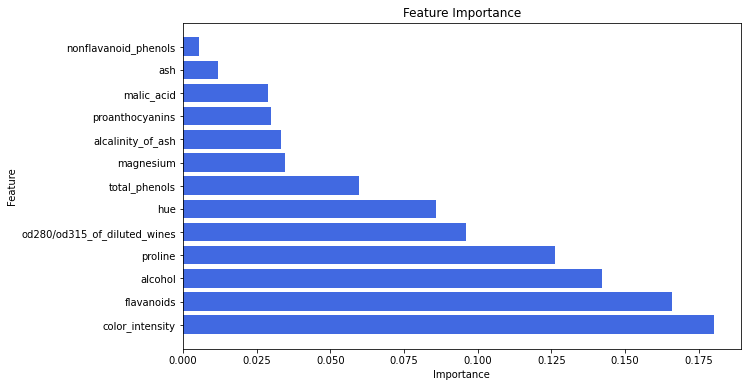

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()